In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import multiprocessing
import itertools
import warnings

from collections import Counter
from pandas.api.types import is_numeric_dtype

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, 
    AdaBoostClassifier, 
    VotingClassifier, 
    GradientBoostingClassifier,
    BaggingClassifier, 
    ExtraTreesClassifier
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Metrics & Evaluation
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score, 
    f1_score, roc_auc_score, classification_report, precision_recall_curve,
    r2_score, mean_squared_error
)

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE, ADASYN

import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
warnings.filterwarnings("ignore")

In [139]:
train = pd.read_csv("C:/Users/gahuk/OneDrive/Desktop/libexec/notes/intern/Train_data.csv")

In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [141]:
train.shape

(25192, 42)

In [142]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [143]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


EDA

In [145]:
train['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

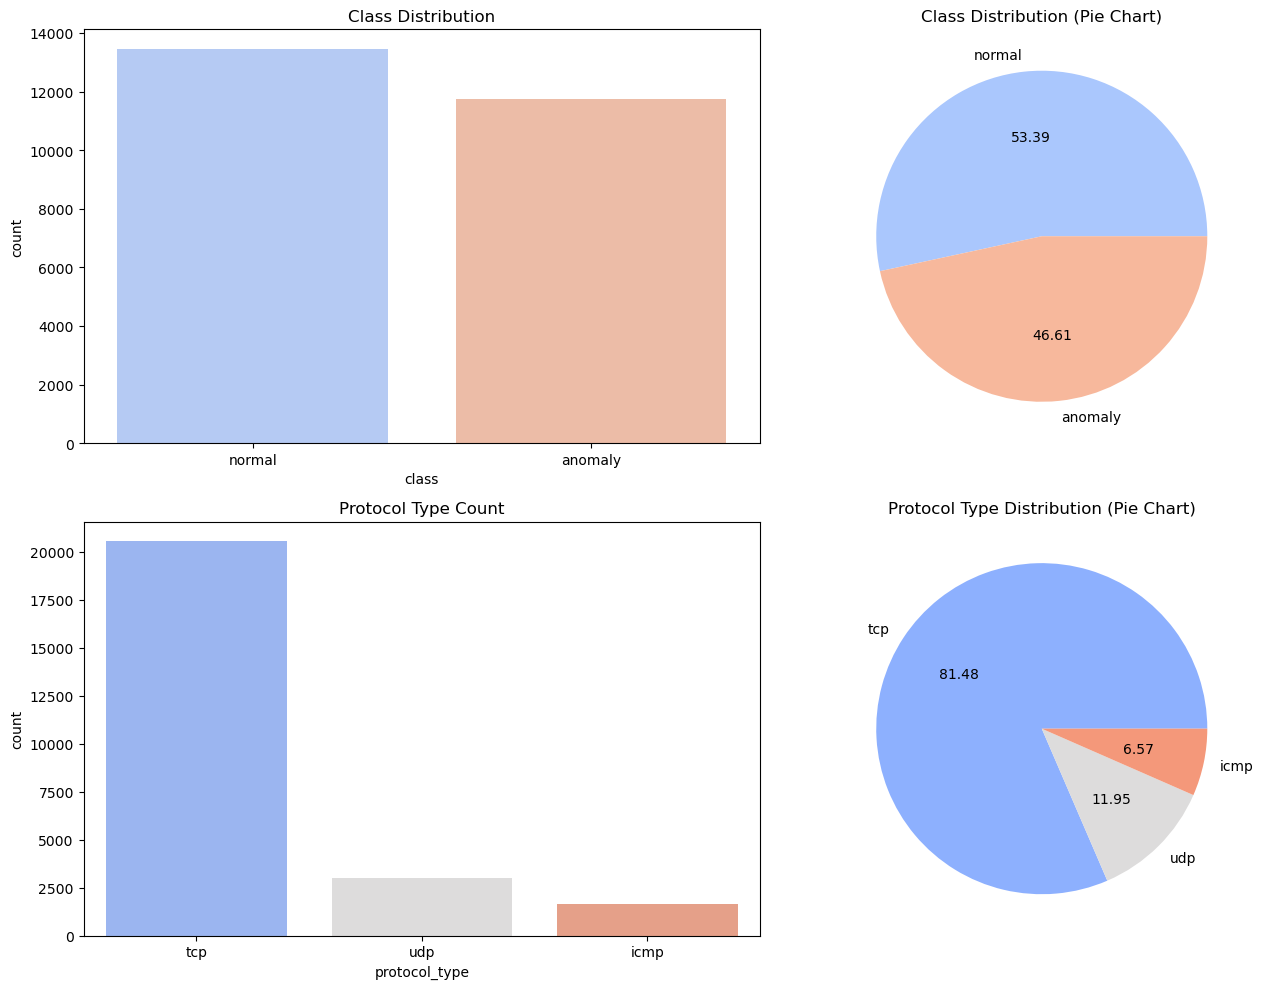

In [146]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Creating a 2x2 grid instead of 2x3

# Define the color palette
palette = "coolwarm"

# First plot: Bar chart of class distribution
sns.countplot(ax=axes[0, 0], x=train['class'], palette=palette)
axes[0, 0].set_title("Class Distribution")

# Second plot: Pie chart of class distribution
axes[0, 1].pie(train['class'].value_counts(), labels=train['class'].value_counts().index, autopct="%0.2f", colors=sns.color_palette(palette, n_colors=2))
axes[0, 1].set_title("Class Distribution (Pie Chart)")

# Third plot: Bar chart of protocol type
sns.countplot(ax=axes[1, 0], x=train['protocol_type'], palette=palette)
axes[1, 0].set_title("Protocol Type Count")

# Fourth plot: Pie chart of protocol type
axes[1, 1].pie(train['protocol_type'].value_counts(), labels=train['protocol_type'].value_counts().index, autopct="%0.2f", colors=sns.color_palette(palette, n_colors=3))
axes[1, 1].set_title("Protocol Type Distribution (Pie Chart)")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

Data Preprocessing

In [147]:
# missing value
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [148]:
#duplicates
print(f"Number of duplicates: {train.duplicated().sum()}")

Number of duplicates: 0


In [149]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [150]:
#Label Encoding
label_encoder = LabelEncoder()
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                df[col] = label_encoder.fit_transform(df[col])

le(train)

In [151]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,16,2,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,0
25188,0,1,19,9,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,0
25189,0,1,46,1,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0
25190,0,1,38,5,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0


Index(['flag', 'hot', 'num_compromised', 'su_attempted', 'num_root',
       'is_guest_login', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


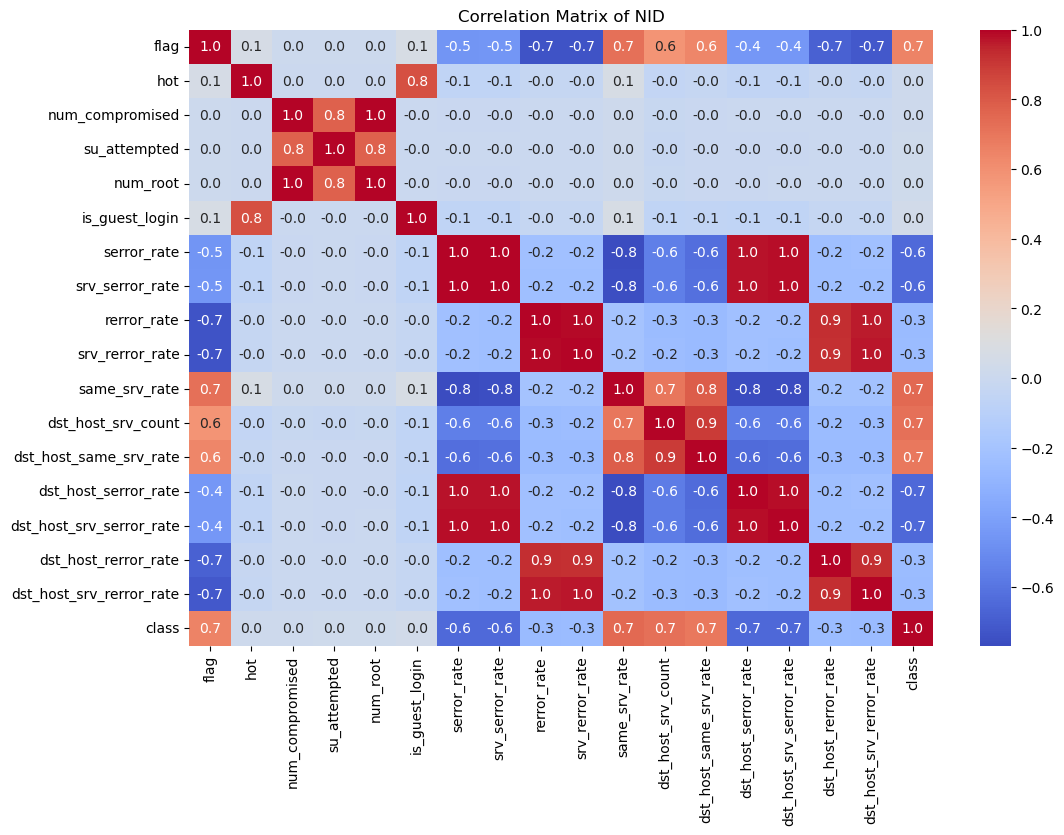

In [152]:
# only strong correlations
corr_matrix = train.corr()
threshold = 0.7

# Create a mask for values above the threshold or below the negative threshold, excluding self-correlation
mask = np.abs(corr_matrix) >= threshold
np.fill_diagonal(mask.values, False)

# Filter the columns and rows based on the mask
filtered_columns = corr_matrix.columns[mask.any()]
filtered_corr = corr_matrix.loc[filtered_columns, filtered_columns]

print(filtered_columns)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlation Matrix of NID')
plt.show()

In [153]:
#feature selection
train['num_outbound_cmds']

0        0
1        0
2        0
3        0
4        0
        ..
25187    0
25188    0
25189    0
25190    0
25191    0
Name: num_outbound_cmds, Length: 25192, dtype: int64

In [154]:
#Drop the redundant feature
train.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [155]:
X = train.drop(['class'], axis=1)
y = train['class']
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X, y)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X.columns)]
selected_features = [v for i, v in feature_map if i==True]
top_features = pd.DataFrame({'Features': selected_features})
top_features.index = top_features.index + 1

In [156]:
top_features

,Features
1,protocol_type
2,service
3,flag
4,src_bytes
5,dst_bytes
6,count
7,same_srv_rate
8,diff_srv_rate
9,dst_host_srv_count
10,dst_host_same_srv_rate


In [157]:
#standard scaler
X = X[selected_features]
scale = StandardScaler()
X = scale.fit_transform(X)

In [158]:
print("Selected Features:", selected_features)

Selected Features: ['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate']


In [159]:
#data splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=2)

### Model Selection
- Random Forest
- Logistic Regression
- Support Vector Machine (SVM)
- Decision Tree
- K-Nearest Neighbors (KNN)

======================== Random Forest Classifier ========================
Accuracy:  0.9964278626711649
Precision:  0.9977777777777778
Random Forest Classification Report of NID:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2333
           1       1.00      1.00      1.00      2706

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



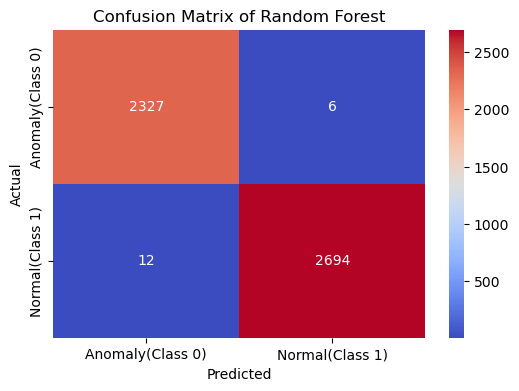


Confusion Matrix Parameters for Random Forest):
True Negatives (TN): 2327
False Positives (FP): 6
False Negatives (FN): 12
True Positives (TP): 2694


In [160]:
# Random Forest
print('======================== Random Forest Classifier ========================')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
report = classification_report(y_test, rfc_pred)
cm = confusion_matrix(y_test, rfc_pred)

print("Accuracy: ", accuracy_score(y_test,rfc_pred))
print("Precision: ", precision_score(y_test,rfc_pred))
print("Random Forest Classification Report of NID:\n", report)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Anomaly(Class 0)","Normal(Class 1)"], yticklabels=["Anomaly(Class 0)","Normal(Class 1)"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix of Random Forest")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, rfc_pred).ravel()
print('\nConfusion Matrix Parameters for Random Forest):')
print("True Negatives (TN):",tn)
print("False Positives (FP):",fp)
print("False Negatives (FN):",fn)
print("True Positives (TP):",tp)

======================== Logistic Regression ========================
Accuracy:  0.9192300059535622
Precision:  0.9069026548672566
Logistic Regression Classification Report of NID:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      2333
           1       0.91      0.95      0.93      2706

    accuracy                           0.92      5039
   macro avg       0.92      0.92      0.92      5039
weighted avg       0.92      0.92      0.92      5039



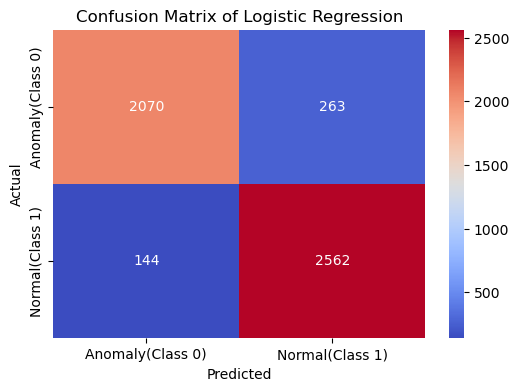


Confusion Matrix Parameters for Logistic Regression):
True Negatives (TN): 2070
False Positives (FP): 263
False Negatives (FN): 144
True Positives (TP): 2562


In [94]:
#Logistic Regression
print('======================== Logistic Regression ========================')
lrc = LogisticRegression()
lrc.fit(X_train,y_train)
lrc_pred = lrc.predict(X_test)
report = classification_report(y_test, lrc_pred)
cm = confusion_matrix(y_test, lrc_pred)

print("Accuracy: ", accuracy_score(y_test,lrc_pred))
print("Precision: ", precision_score(y_test,lrc_pred))
print("Logistic Regression Classification Report of NID:\n", report)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Anomaly(Class 0)","Normal(Class 1)"], yticklabels=["Anomaly(Class 0)","Normal(Class 1)"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, lrc_pred).ravel()
print('\nConfusion Matrix Parameters for Logistic Regression):')
print("True Negatives (TN):",tn)
print("False Positives (FP):",fp)
print("False Negatives (FN):",fn)
print("True Positives (TP):",tp)

=============================== Support Vector Machine ==============================
Accuracy:  0.9769795594363961
Precision:  0.9712518195050946
SVM Classification Report of NID:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      2333
           1       0.97      0.99      0.98      2706

    accuracy                           0.98      5039
   macro avg       0.98      0.98      0.98      5039
weighted avg       0.98      0.98      0.98      5039



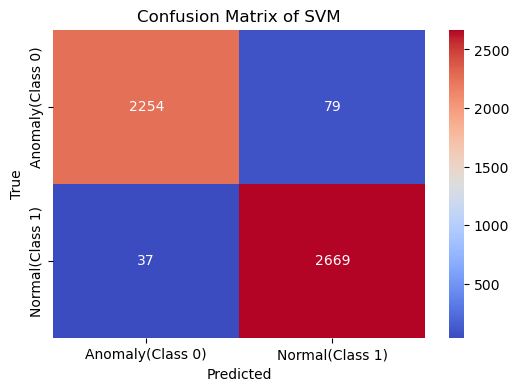


Confusion Matrix Parameters for Support Vector Machine (SVM):
True Negatives (TN): 2254
False Positives (FP): 79
False Negatives (FN): 37
True Positives (TP): 2669


In [99]:
#Support Vector Machine (SVM)
print('=============================== Support Vector Machine ==============================')
svm = SVC(kernel='poly', gamma=1.0)
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)
report = classification_report(y_test, svm_pred)
cm = confusion_matrix(y_test, svm_pred)

print("Accuracy: ", accuracy_score(y_test,svm_pred))
print("Precision: ", precision_score(y_test,svm_pred))
print("SVM Classification Report of NID:\n", report)
plt.figure(figsize=(6, 4))
#sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Anomaly(Class 0)","Normal(Class 1)"], yticklabels=["Anomaly(Class 0)","Normal(Class 1)"])
#sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix of SVM")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, svm_pred).ravel()
print('\nConfusion Matrix Parameters for Support Vector Machine (SVM):')
print("True Negatives (TN):",tn)
print("False Positives (FP):",fp)
print("False Negatives (FN):",fn)
print("True Positives (TP):",tp)

### Training and Validation Accuracy

In [100]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [101]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [102]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [103]:
history = model.fit(X_train,y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8818 - loss: 0.2991 - val_accuracy: 0.9645 - val_loss: 0.1190
Epoch 2/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9580 - loss: 0.1264 - val_accuracy: 0.9635 - val_loss: 0.1065
Epoch 3/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9598 - loss: 0.1217 - val_accuracy: 0.9633 - val_loss: 0.1026
Epoch 4/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9609 - loss: 0.1145 - val_accuracy: 0.9635 - val_loss: 0.0983
Epoch 5/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9653 - loss: 0.1080 - val_accuracy: 0.9685 - val_loss: 0.0919
Epoch 6/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9661 - loss: 0.1029 - val_accuracy: 0.9670 - val_loss: 0.0911
Epoch 7/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9654 - loss: 0.0998 - val_accuracy: 0.9660 - val_loss: 0.0919
Epoch 8/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9650 - loss: 0.1021 - val_accuracy: 0.

In [104]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print(f'Test accuracy: {test_acc}')

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.9684 - loss: 0.0918
Test accuracy: 0.9692399501800537


In [105]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step


In [106]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,453 (33.02 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,636 (22.02 KB)

In [107]:
y_pred = (predictions > 0.5).astype(int)

In [108]:
report = classification_report(y_test, y_pred)

In [109]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2333
           1       0.96      0.99      0.97      2706

    accuracy                           0.97      5039
   macro avg       0.97      0.97      0.97      5039
weighted avg       0.97      0.97      0.97      5039



### Model Summary
- Confusion Matrix Parameters
- Model Performance Comparison for Intrusion Detection
- Accuracy of Different ML Models

Confusion Matrix Parameters for All Models:
                    Model  True Negatives (TN)  False Positives (FP)  \
0           Random Forest                 2327                     6   
1  Support Vector Machine                 2254                    79   
2     Logistic Regression                 2070                   263   

   False Negatives (FN)  True Positives (TP)  
0                    12                 2694  
1                    37                 2669  
2                   144                 2562  


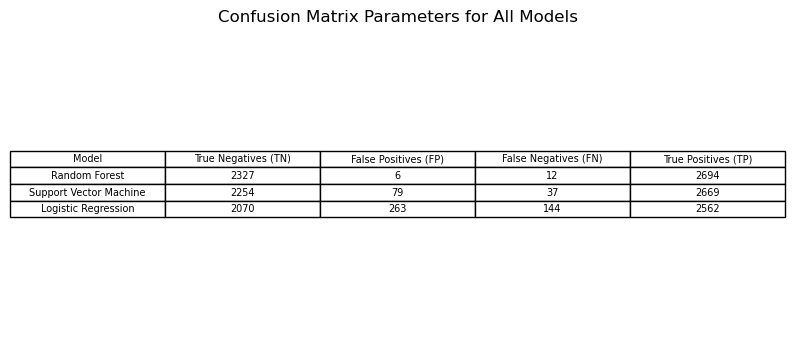

In [132]:
def get_confusion_matrix_params(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn, fp, fn, tp

# Initialize a dictionary to store confusion matrix parameters
confusion_matrix_data = {
    'Model': [],
    'True Negatives (TN)': [],
    'False Positives (FP)': [],
    'False Negatives (FN)': [],
    'True Positives (TP)': []
}

# Evaluate each model
models = {
    'Random Forest': rfc_pred,
    'Support Vector Machine': svm_pred,
    'Logistic Regression': lrc_pred
}

for model_name, y_pred in models.items():
    tn, fp, fn, tp = get_confusion_matrix_params(y_test, y_pred)
    confusion_matrix_data['Model'].append(model_name)
    confusion_matrix_data['True Negatives (TN)'].append(tn)
    confusion_matrix_data['False Positives (FP)'].append(fp)
    confusion_matrix_data['False Negatives (FN)'].append(fn)
    confusion_matrix_data['True Positives (TP)'].append(tp)

# Create a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix_data)

# Display the table
print("Confusion Matrix Parameters for All Models:")
print(confusion_matrix_df)

# Optionally, save the table to a CSV file
#confusion_matrix_df.to_csv('confusion_matrix_parameters.csv', index=False)

# Plot the table
plt.figure(figsize=(10, 4))
plt.axis('off')  # Hide axes
plt.table(cellText=confusion_matrix_df.values, colLabels=confusion_matrix_df.columns, loc='center', cellLoc='center')
plt.title("Confusion Matrix Parameters for All Models")
plt.show()

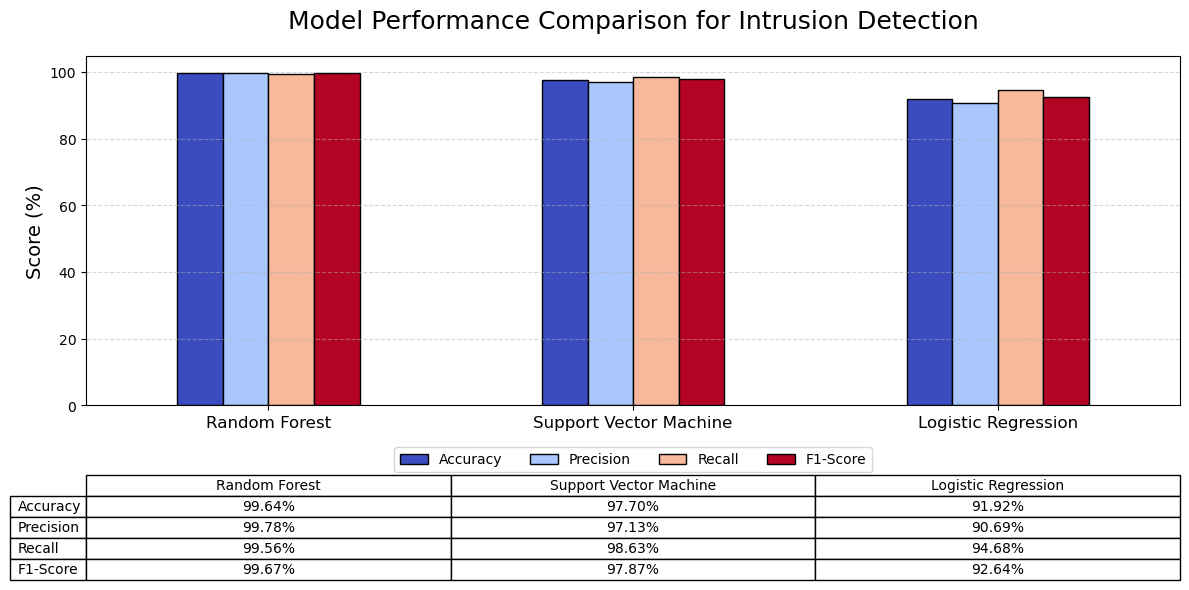

In [133]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred) * 100  # Convert to percentage
    precision = precision_score(y_true, y_pred) * 100
    recall = recall_score(y_true, y_pred) * 100
    f1 = f1_score(y_true, y_pred) * 100
    return accuracy, precision, recall, f1

# Define models and their predictions
models = {
    'Random Forest': rfc_pred,
    'Support Vector Machine': svm_pred,
    'Logistic Regression': lrc_pred
}

# Calculate metrics for each model
results = []
for model_name, y_pred in models.items():
    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
    results.append([accuracy, precision, recall, f1])

# Convert results to a DataFrame (metrics as rows)
df_results = pd.DataFrame(results, index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score']).T

# Format all values to percentages with two decimal places
df_results = df_results.applymap(lambda x: f"{x:.2f}%")

# Convert to numeric for plotting (ignoring % symbols)
df_plot = df_results.replace({'%': ''}, regex=True).astype(float)

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot grouped bar chart
df_plot.T.plot(kind='bar', ax=ax, colormap="coolwarm", edgecolor="black")

# Formatting
plt.title("Model Performance Comparison for Intrusion Detection", fontsize=18, pad=20)
plt.ylabel("Score (%)", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(loc="upper center", ncol=4, fontsize=10, bbox_to_anchor=(0.5, -0.1))
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add table below the graph
table_data = df_results.values
table = plt.table(cellText=table_data, rowLabels=df_results.index, colLabels=df_results.columns,
                  cellLoc='center', loc='bottom', bbox=[0, -0.5, 1, 0.3])

# Adjust layout to make space for the table
plt.subplots_adjust(bottom=0.3)

# Show plot
plt.tight_layout()
plt.show()

### Prediction for Testing Dataset
- Reading the Testing Dataset
- EDA
- Missing Values
- Duplicates
- Label Encoding
- Prediction of Test Data

In [112]:
test = pd.read_csv("C:/Users/gahuk/OneDrive/Desktop/libexec/notes/intern/Test_data.csv")

In [113]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [114]:
test.shape

(22544, 41)

In [115]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [116]:
test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
test['num_outbound_cmds']

0        0
1        0
2        0
3        0
4        0
        ..
22539    0
22540    0
22541    0
22542    0
22543    0
Name: num_outbound_cmds, Length: 22544, dtype: int64

In [118]:
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [119]:
test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_c

In [120]:
print(f"Number of duplicates: {test.duplicated().sum()}")

Number of duplicates: 57


In [121]:
test.drop_duplicates(inplace=True)

In [122]:
test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22487.000000,2.248700e+04,2.248700e+04,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,...,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000,22487.000000
mean,219.413839,1.042155e+04,2.060921e+03,0.000311,0.008449,0.000712,0.105661,0.021701,0.443323,0.120203,...,193.720861,140.504380,0.607873,0.090617,0.132586,0.019688,0.098056,0.099678,0.233848,0.227124
std,1408.915818,4.733850e+05,2.124595e+04,0.017641,0.142779,0.036519,0.929589,0.150514,0.496788,7.278803,...,94.103599,111.779078,0.435770,0.220709,0.306588,0.085496,0.273442,0.282179,0.387459,0.401129
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,120.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,166.000000,0.920000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.080000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
test.describe(include='object')

,protocol_type,service,flag
count,22487,22487,22487
unique,3,64,11
top,tcp,http,SF
freq,18877,7853,14821


In [124]:
le(test)

In [125]:
test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,45,1,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,1,45,1,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,1,19,9,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,0,13,9,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,1,55,2,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,1,22,9,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,1,22,9,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,2,11,9,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


In [134]:
X = test[selected_features]
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [135]:
rfc.predict(X_scaled)

array([0, 0, 1, ..., 1, 1, 0])

In [136]:
lrc.predict(X_scaled)

array([0, 0, 1, ..., 1, 1, 0])

In [137]:
svm.predict(X_scaled)

array([0, 0, 1, ..., 0, 1, 0])

This project focuses on developing a hybrid Intrusion Detection System (IDS) or Network Intrusion Detection (NID) that leverages machine learning (ML) models to detect network-based intrusions with high accuracy. The system combines signature-based and anomaly-based detection methods, enhancing its ability to recognize known and emerging cyber threats. It utilizes supervised learning algorithms, including Random Forest, SVM, Decision Trees, Logistic Regression, and KNN, to classify network traffic using benchmark datasets for NSL-KDD.